# <font color='e6005c'> Hypothesis Testing  Assignment

In [1]:
# immporting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

## <font color='b30047'>Question 1

## A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


## Minitab File : Cutlets.mtw


## <font color='1a1aff'>Answer 1

<font color='e6005c'>Hypotheses:

Null hypothesis (H0): No significant difference in cutlet diameter between the two units.

Alternative hypothesis (H1): Significant difference in cutlet diameter between the two units.

<font color='e6005c'>Assumptions:

Cutlet diameter measurements follow a normal distribution.

Samples collected from both units are independent.

Variances of cutlet diameters in both units are equal.

Significance level: 5%

<font color='e6005c'>Test:

Two-sample t-test to compare the means of the two independent samples.

<font color='e6005c'>Interpretation:

If p-value < 0.05, reject the null hypothesis, indicating a significant difference in cutlet diameter between the two units.

If p-value >= 0.05, fail to reject the null hypothesis, suggesting no significant difference in cutlet diameter between the two units.

+ **Null Hypothesis:** $\mu_1 = \mu_2$
+ **Alternative Hypthosis:** $\mu_1 \neq \mu_2$

####     As it is a two-tailed test
+ **alpha/2 = 0.025**

In [3]:
data=pd.read_csv('cutlets.csv')

In [4]:
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
data.shape

(35, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
#applying descriptive statistics
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [8]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data[data.duplicated()]


,Unit A,Unit B


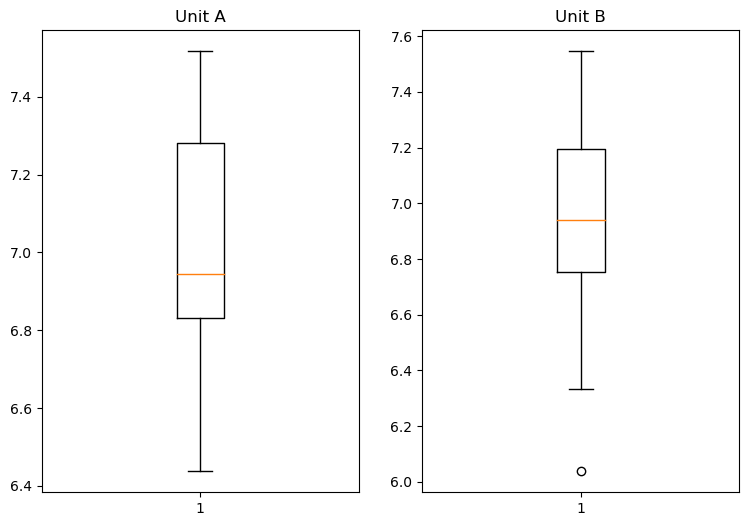

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(data['Unit B'])
plt.title('Unit B')
plt.show()

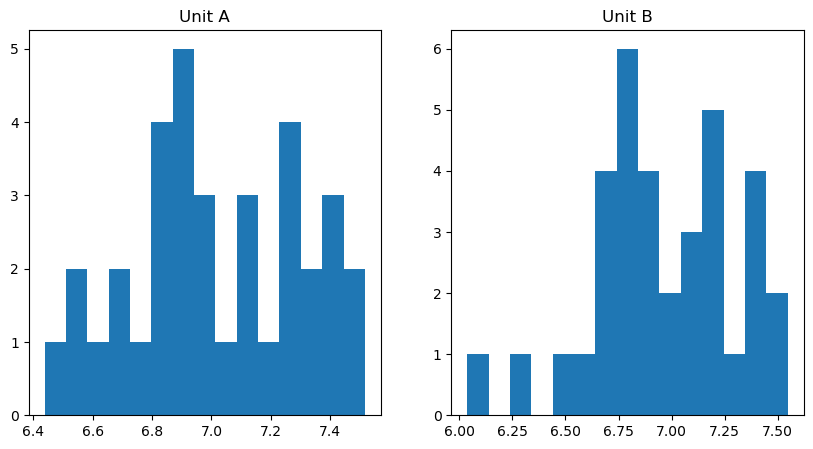

In [12]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.hist(data['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(data['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

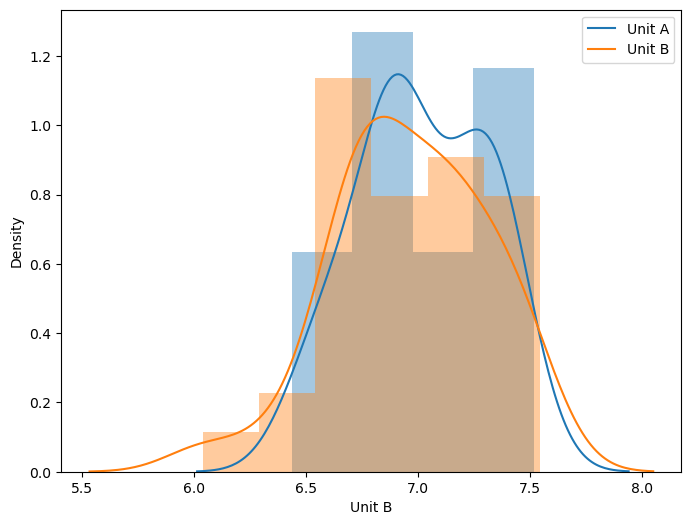

In [13]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(data['Unit A'], kde = True)
sns.distplot(data['Unit B'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

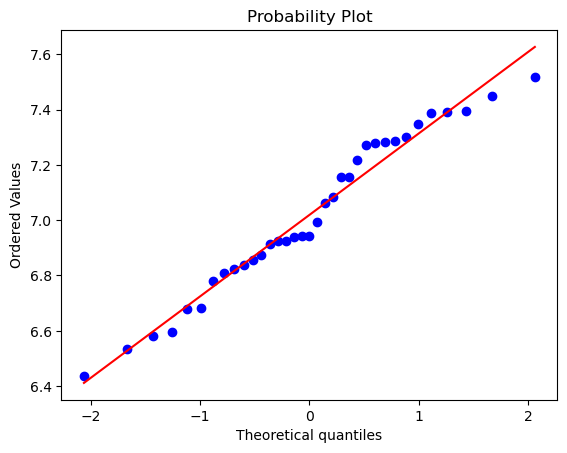

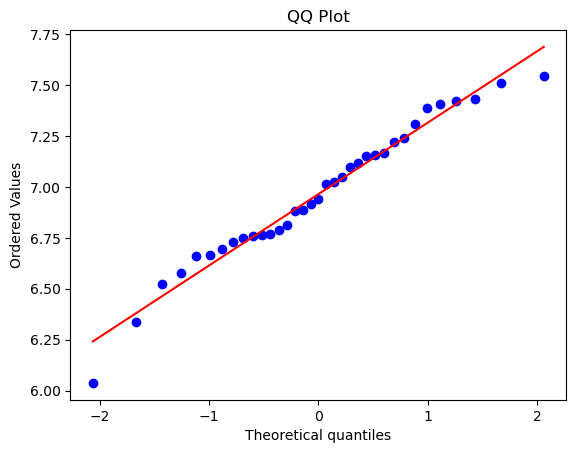

In [14]:
# Create a QQ plot using probplot
fig, ax = plt.subplots()
stats.probplot(data['Unit A'], plot=ax)
fig, ax = plt.subplots()

stats.probplot(data['Unit B'], plot=ax)

# Set plot labels
ax.set_title("QQ Plot")

# Show the plot
plt.show()


### Compare Evidences with Hypothesis using t-statistics

In [15]:
statistic , p_value = stats.ttest_ind(data['Unit A'],data['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [16]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


## Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# <font color='red'>Question 2

## A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
## Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 

## Minitab File: LabTAT.mtw


## <font color='1a1aff'>Answer 2

### To analyze the data and determine if there is any difference in the average Turn Around Time (TAT) among the different laboratories, we can perform a statistical test called Analysis of Variance (ANOVA). The ANOVA test will help us determine if there are any significant differences in the means of multiple groups.

## <font color='red'>Step 1
### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove
    
+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente
## <font color='red'>Step 2
### Decide a cut-off value
+ **Significance 5%**
+ **alpha = 0.05**
## <font color='red'>Step 3 
### Collect evidence

In [17]:
data=pd.read_csv('labTAT.csv')
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
data.shape

(120, 4)

In [19]:
data.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [20]:
data.keys()

Index(['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'], dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [22]:
# apply descriptive statistics
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [23]:
# checking for the null values
data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [24]:
# checking duplicate val
data[data.duplicated()].shape

(0, 4)

In [25]:
data.columns

Index(['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'], dtype='object')

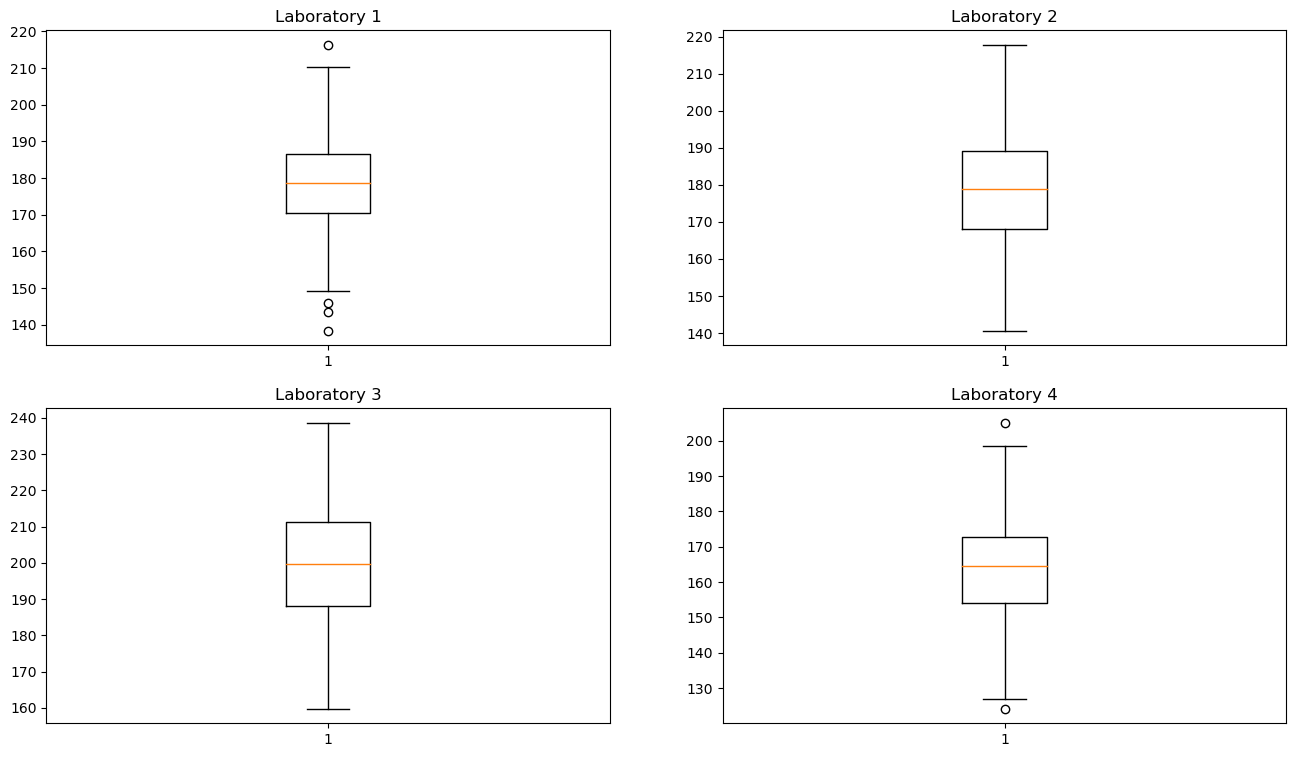

In [26]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

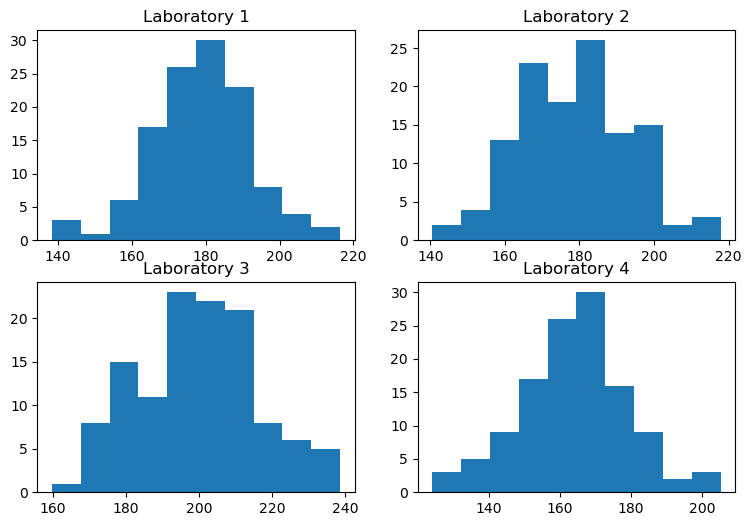

In [27]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

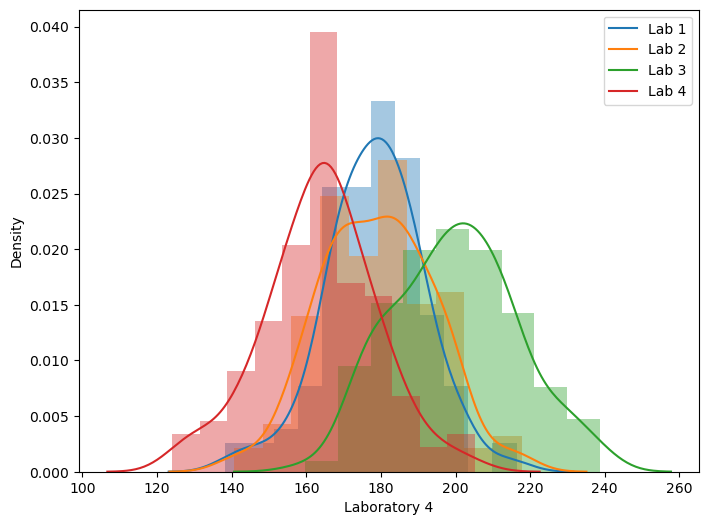

In [28]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(data['Laboratory 1'], kde = True)
sns.distplot(data['Laboratory 2'],hist = True)
sns.distplot(data['Laboratory 3'],hist = True)
sns.distplot(data['Laboratory 4'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

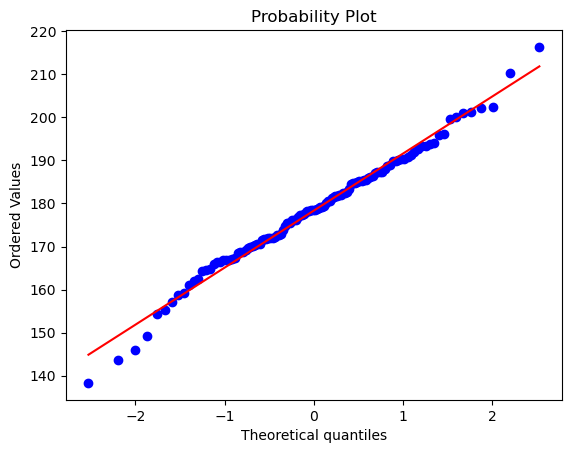

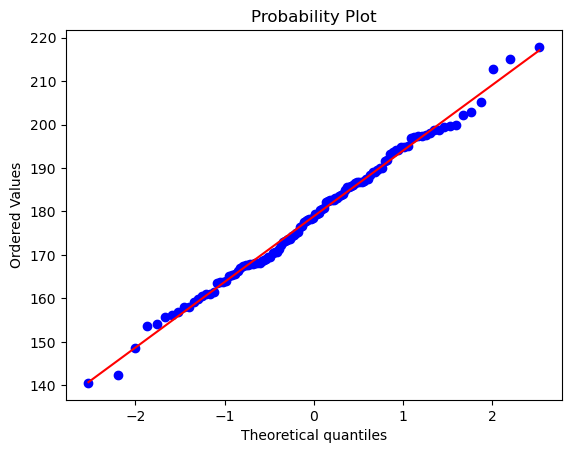

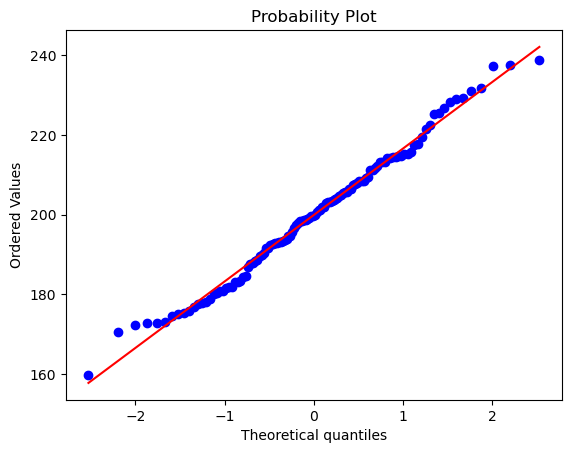

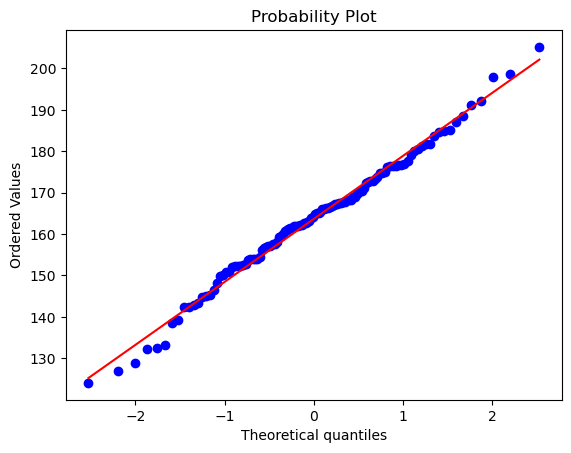

In [29]:

fig, ax = plt.subplots()
ax.set_title('Laboratory 1')
stats.probplot(data['Laboratory 1'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 2')
stats.probplot(data['Laboratory 2'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 3')
stats.probplot(data['Laboratory 3'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 4')
stats.probplot(data['Laboratory 4'], plot=ax)

plt.show()


## <font color='red'>Step 4
### Compare Evidences with Hypothesis using t-statistic

In [30]:
test_statistic , p_value = stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


### Compare p_value with '$\alpha$ '(Significane Level)
### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis
### interpreting p-value

In [31]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


## Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# <font color='red'>Question 3

In [32]:
from PIL import ImageGrab

ImageGrab.grabclipboard()

## <font color='1a1aff'>Answer 3

### We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table

### We need to check whether the proportion of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** There is no association or dependency between the gender based buyer rations across regions
+ **Alternative Hypthosis:** There is a significant association or dependency between the gender based buyer rations across regions

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

### As it is a one-tailed test
+ **alpha = 1-0.95 = 0.05**

## <font color='red'>Step 3 
### Collect evidence

In [33]:
data=pd.read_csv('BuyerRatio.csv',index_col=0)
data.head()

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [34]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

### Applying Chi-Square $\chi_2$ contingency table to convert observed value into expected value

In [35]:
stat, p, dof, exp = stats.chi2_contingency(data) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [36]:
stats.chi2_contingency(table) 

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [37]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

### Comparing Evidence with Hypothesis

In [38]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

In [39]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# <font color='red'>Question 4

## TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

## Minitab File: CustomerOrderForm.mtw
 
     

## <font color='1a1aff'>Answer 4

## We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table
### We need to check whether the mean of any of these samples are different or the same?
##  <font color='red'>Step 1
    
### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove
  + **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente
## <font color='red'>Step 2
### Decide a cut-off value
+ **Significance 5%**
+ **alpha = 0.05**
## <font color='red'>Step 3 
### Collect evidence

In [40]:
data=pd.read_csv('Costomer+OrderForm.csv')
data.head(12)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [41]:
#Applying Descriptive Statistics

In [42]:
data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [43]:
data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [44]:
dup=data[data.duplicated()]
dup.head()

,Phillippines,Indonesia,Malta,India
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [45]:
dup.shape

(290, 4)

In [46]:
data.columns

Index(['Phillippines', 'Indonesia', 'Malta', 'India'], dtype='object')

In [47]:
print(data['Phillippines'].value_counts())
print(data['Indonesia'].value_counts())
print(data['Malta'].value_counts())
print(data['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [48]:
# Creating Contingency table
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [49]:
# Calculating Expected Values for Observed data
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [50]:
# Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [51]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [52]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack of evidence.
